In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io
import pickle


In [7]:
image_path = "img.jpeg"

# Open the image using skimage io
img = io.imread(image_path)


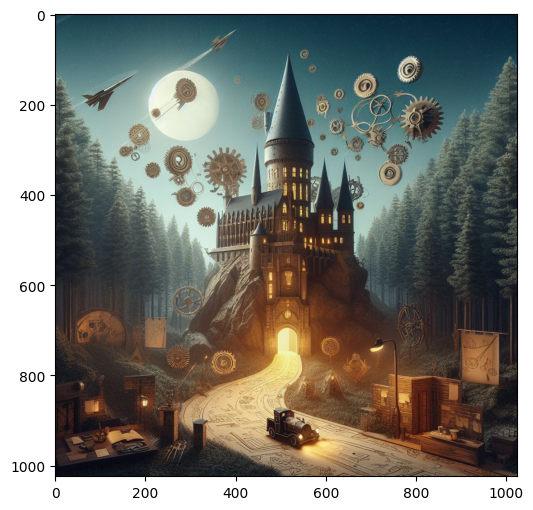

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(img)


In [9]:
img_init = img.copy() # save a copy of initial image, will modify this image for clustering

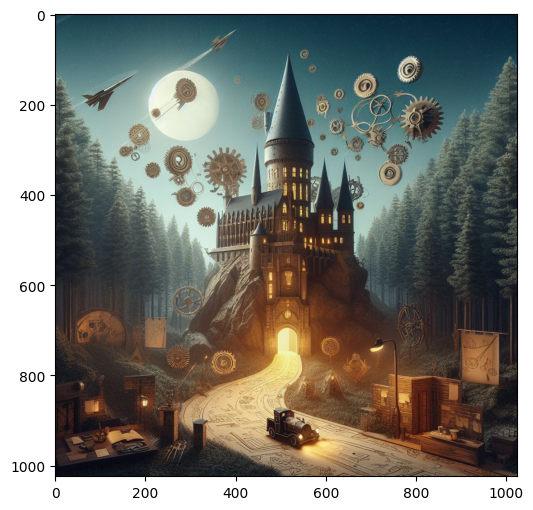

In [10]:
plt.figure(figsize=(6, 6)) # plot initial image
plt.imshow(img_init)


In [11]:
img = img.reshape((img.shape[0] * img.shape[1],img.shape[2])) 

In [12]:
img.shape

(1048576, 3)

In [13]:
img

array([[ 15,  57,  69],
       [ 17,  59,  71],
       [ 21,  63,  75],
       ...,
       [ 99,  79,  68],
       [102,  82,  71],
       [ 97,  77,  66]], shape=(1048576, 3), dtype=uint8)

In [14]:
k = 15
clt = KMeans(n_clusters = k) # "pick out" the K-means tool from our collection of algorithms
clt.fit(img) # apply the model to our data, the image

KMeans(n_clusters=15)

In [15]:
clt.labels_

array([13, 13, 13, ...,  1,  1,  1], shape=(1048576,), dtype=int32)

In [16]:
label_indx = np.arange(0,len(np.unique(clt.labels_)) + 1) 

In [17]:
label_indx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [18]:
np.histogram(clt.labels_, bins = label_indx)

(array([ 54257,  74538, 124975,  33296,  89115, 146439, 105159,  30122,
         40511,  66432,  49933,  44077,  46153,  93997,  49572]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [19]:
(hist, _) = np.histogram(clt.labels_, bins = label_indx)

hist = hist.astype("float")

hist /= hist.sum()
hist

array([0.05174351, 0.07108498, 0.11918545, 0.03175354, 0.08498669,
       0.13965511, 0.10028744, 0.02872658, 0.0386343 , 0.06335449,
       0.04761982, 0.0420351 , 0.04401493, 0.08964252, 0.04727554])

In [20]:
hist_bar = np.zeros((50, 400, 3), dtype = "uint8") 

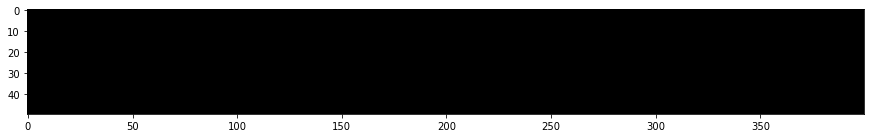

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(hist_bar)

In [21]:
startX = 0
for (percent, color) in zip(hist,  clt.cluster_centers_): 
  endX = startX + (percent * 400) # to match grid
  cv2.rectangle(hist_bar, (int(startX), 0), (int(endX), 50),
      color.astype("uint8").tolist(), -1)
  startX = endX

<function matplotlib.pyplot.show(close=None, block=None)>

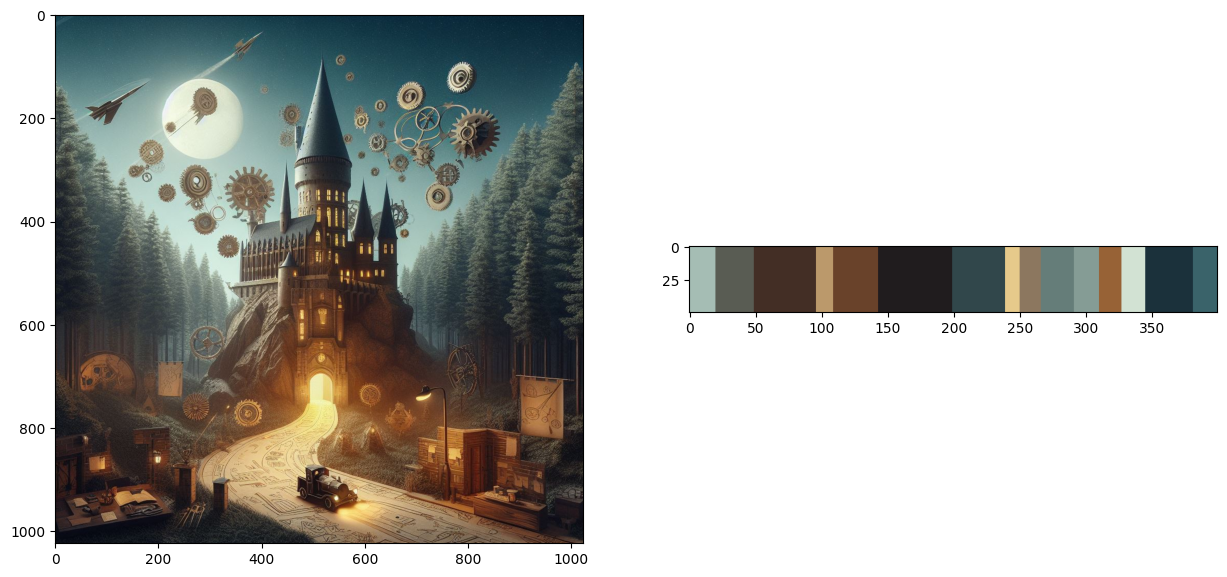

In [22]:
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(img_init)
plt.subplot(122)
plt.imshow(hist_bar)
plt.show

In [23]:
pickle.dump(clt, open('colormodel1.pkl', 'wb'))

# Loading model to compare the results
model = pickle.load(open('colormodel1.pkl', 'rb'))